In [2]:
!pip install seaborn >> None

In [1]:
import pandas as pd
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779913/stratified_valid.csv')
df

,car_id,target_reg,num_fold
0,y13744087j,9492.96,NaN
1,O41613818T,2656.23,NaN
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN
...,...,...,...
2332,j21246192N,547.30,NaN
2333,h-1554287F,26414.19,NaN
2334,A15262612g,2677.95,NaN
2335,W-2514493U,2213.63,NaN


In [13]:
import random
df['num_fold'] = df.num_fold.apply(lambda _: random.randint(0, 9))
df.num_fold.value_counts()

num_fold
9    247
3    245
0    244
1    235
6    234
8    231
4    229
7    228
5    223
2    221
Name: count, dtype: int64

In [53]:
from sklearn.model_selection import StratifiedKFold, KFold
X,y = df.drop(columns='target_reg'), df.target_reg
skf = KFold(n_splits=10, random_state=42, shuffle=True)
skf.get_n_splits(X, y)

10

In [58]:
for train_index, test_index in skf.split(X, y):
    print(y[test_index].mean())

4295.688205128205
3676.7664957264956
3432.8120085470086
4812.280213675214
3655.9708547008545
3334.5644444444447
3851.6271794871795
3805.529570815451
3660.0621459227473
3719.4724034334768


# Test

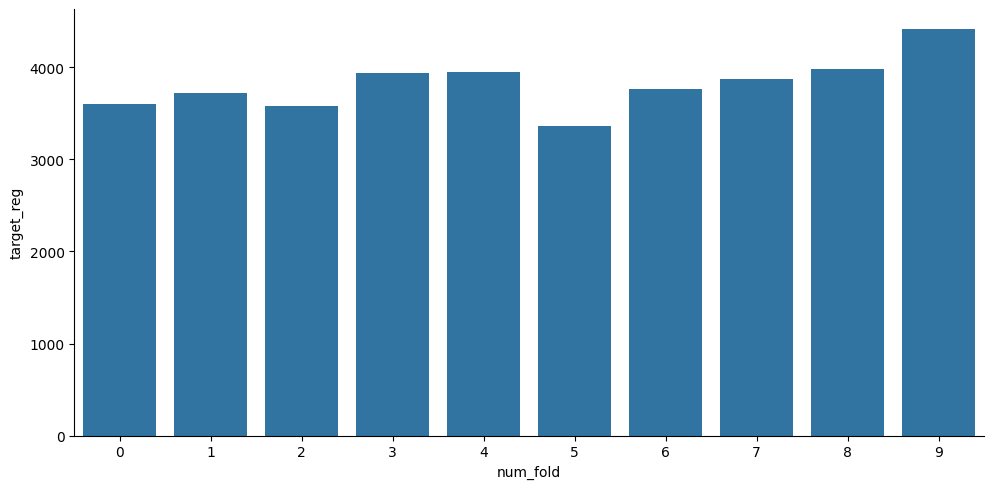

In [14]:
import seaborn as sns

tmp = df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

In [16]:
df.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

286.72721085796417

# multi-label stratified

In [89]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779913/multi_label.csv')
df

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3819,1,0,0,0,0,0,0,0,0,0,0,0
9996,3817,0,1,0,0,0,0,1,0,0,0,0,1
9997,3816,1,0,0,0,0,0,0,0,0,1,0,0
9998,3814,0,1,0,0,0,0,0,0,0,1,0,1


In [90]:
df['target'] = df.drop(columns='ID').sum(axis=1)

In [91]:
from sklearn.model_selection import StratifiedKFold, KFold
X, y = df.drop(columns='target'), df.target
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [92]:
for fold_num, (train_index, test_index) in enumerate(skf.split(X, y)):
    df.loc[test_index, 'kfold'] = fold_num

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [93]:
df.kfold.value_counts()

kfold
0.0    2000
1.0    2000
2.0    2000
3.0    2000
4.0    2000
Name: count, dtype: int64

# Test

In [94]:
targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
           'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
           'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']
tmp = df.groupby(['kfold'], as_index=False).sum()  
tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
print(tmp_melt.groupby(['class'], as_index=False).std()['count'].mean())

112.03059200249142
